In [1]:
from shared.http import get
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_url = "http://www.illustris-project.org/api/Illustris-3-Dark/"
simulation_metadata = get(base_url)
today_snaps_url = simulation_metadata['snapshots'] +  "z=0"
simulation_today = get(today_snaps_url)
# params = 

In [3]:
simulation_today

{'simulation': 'http://www.illustris-project.org/api/Illustris-3-Dark/',
 'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_gas': 0,
 'num_dm': 94196375,
 'num_trmc': 0,
 'num_stars': 0,
 'num_bhs': 0,
 'num_groups_fof': 94028,
 'num_groups_subfind': 111992,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 3391122236.0,
 'filesize_groupcat': 38768256.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.illustris-project.org/api/Illustris-3-Dark/snapshots/135/',
 'subhalos': 'http://www.illustris-project.org/api/Illustris-3-Dark/snapshots/135/subhalos/',
 'vis': {'groupcat_halo_sizemass': 'http://www.illustris-project.org/api/Illustris-3-Dark/snapshots/135/subhalos/plot.png?xQuant=mhalo_200_log&yQuant=rhalo_200&xlim=9.0%2C15.0'},
 'files': {'snapshot': 'http://www.illustris-project.org/api/Illustris-3-Dark/files/snapshot-135/',
  'groupcat': 'http://www.illustris-project.org/api/Illustris-3-Dark/files/groupcat-135/'}}

In [4]:
today_snaps_files_url = simulation_today['files']['snapshot']
today_snaps_files = get(today_snaps_files_url)['files']

In [7]:
snap0 = get(today_snaps_files[0])

{'Date': 'Tue, 23 Apr 2024 20:50:22 GMT', 'Server': 'Apache', 'Content-Disposition': 'attachment; filename=snap_135.0.hdf5', 'X-Frame-Options': 'SAMEORIGIN', 'Last-Modified': 'Sun, 08 Nov 2015 16:55:26 GMT', 'ETag': '"193165a8-6101629574a37"', 'Content-Length': '422667688', 'Content-Type': 'application/octet-stream', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive'}


In [7]:
snap0 = 'snap_135.0.hdf5'

In [5]:
snap0

NameError: name 'snap0' is not defined

In [8]:
file_snap0 = h5py.File(snap0, 'r')

In [9]:
print(file_snap0.keys())

<KeysViewHDF5 ['Header', 'PartType1']>


In [10]:
dHeader_snap0 = file_snap0['Header']

In [11]:
dHeader_snap0.shape

AttributeError: 'Group' object has no attribute 'shape'

In [12]:
dPart_snap0 = file_snap0['PartType1']

In [13]:
for name in dPart_snap0:
    print(name)

Coordinates
ParticleIDs
Potential
Velocities


In [14]:
coordinates_snap0 = dPart_snap0['Coordinates']

In [30]:
coordinates_snap0.shape

(11740586, 3)

In [15]:
snap0_coord_array = np.array(coordinates_snap0)

In [16]:
x_snap0 = snap0_coord_array[:, 0]
y_snap0 = snap0_coord_array[:, 1]
z_snap0 = snap0_coord_array[:, 2]

In [17]:
x_snap0_reduced = np.random.choice(x_snap0, 1000)
y_snap0_reduced = np.random.choice(y_snap0, 1000)

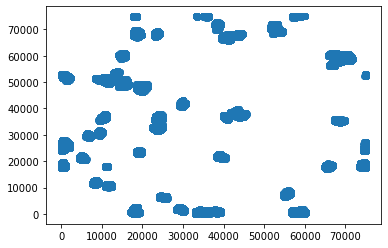

In [57]:
plt.scatter(x_snap0, y_snap0)

No handles with labels found to put in legend.


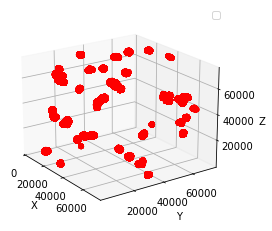

In [18]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x_snap0, y_snap0, z_snap0, c='red')

ax.legend()
ax.set_xlim(np.min(x_snap0), np.max(x_snap0))
ax.set_ylim(np.min(y_snap0), np.max(y_snap0))
ax.set_zlim(np.min(z_snap0), np.max(z_snap0))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20., azim=-35)

plt.show()